## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x=keras.layers.Dense(units=256,activation="relu")(input_layer)
    x=keras.layers.Dense(units=128,activation="relu")(x)
    x=keras.layers.Dense(units=64,activation="relu")(x)
    out=keras.layers.Dense(units=10,activation="softmax")(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])

    return model
model = build_mlp()

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 828,490
Trainable params: 828,490
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy",metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 128us/step - loss: 1.9501 - accuracy: 0.2933 - val_loss: 1.7785 - val_accuracy: 0.3722
Epoch 2/10
50000/50000 [==============================] - 8s 150us/step - loss: 1.7359 - accuracy: 0.3798 - val_loss: 1.7144 - val_accuracy: 0.3826
Epoch 3/10
50000/50000 [==============================] - 7s 149us/step - loss: 1.6377 - accuracy: 0.4167 - val_loss: 1.6737 - val_accuracy: 0.3977
Epoch 4/10
50000/50000 [==============================] - 7s 142us/step - loss: 1.5899 - accuracy: 0.4337 - val_loss: 1.5954 - val_accuracy: 0.4346
Epoch 5/10
50000/50000 [==============================] - 7s 133us/step - loss: 1.5440 - accuracy: 0.4494 - val_loss: 1.5328 - val_accuracy: 0.4575
Epoch 6/10
50000/50000 [==============================] - 6s 129us/step - loss: 1.5097 - accuracy: 0.4630 - val_loss: 1.5347 - val_accuracy: 0.4523
Epoch 7/10
50000/50000 [==============================] - 6s 1

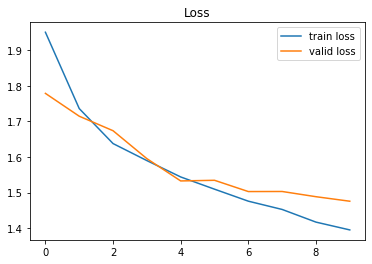

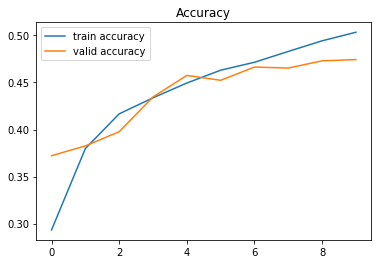

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 208us/step - loss: 1.9144 - accuracy: 0.3107 - val_loss: 1.7492 - val_accuracy: 0.3822
Epoch 2/100
50000/50000 [==============================] - 10s 197us/step - loss: 1.6989 - accuracy: 0.3935 - val_loss: 1.6768 - val_accuracy: 0.3992
Epoch 3/100
50000/50000 [==============================] - 11s 218us/step - loss: 1.6019 - accuracy: 0.4298 - val_loss: 1.5430 - val_accuracy: 0.4513
Epoch 4/100
50000/50000 [==============================] - 12s 234us/step - loss: 1.5390 - accuracy: 0.4506 - val_loss: 1.6089 - val_accuracy: 0.4279
Epoch 5/100
50000/50000 [==============================] - 12s 234us/step - loss: 1.5005 - accuracy: 0.4642 - val_loss: 1.5052 - val_accuracy: 0.4621
Epoch 6/100
50000/50000 [==============================] - 11s 226us/step - loss: 1.4532 - accuracy: 0.4794 - val_loss: 1.4796 - val_accuracy: 0.4742
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.5848 - accuracy: 0.7913 - val_loss: 1.8827 - val_accuracy: 0.5210
Epoch 56/100
50000/50000 [==============================] - 11s 210us/step - loss: 0.5483 - accuracy: 0.8051 - val_loss: 2.0807 - val_accuracy: 0.5016
Epoch 57/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.5765 - accuracy: 0.7944 - val_loss: 1.9694 - val_accuracy: 0.5198
Epoch 58/100
50000/50000 [==============================] - 10s 209us/step - loss: 0.5357 - accuracy: 0.8104 - val_loss: 2.0304 - val_accuracy: 0.5073
Epoch 59/100
50000/50000 [==============================] - 10s 199us/step - loss: 0.5315 - accuracy: 0.8103 - val_loss: 2.0416 - val_accuracy: 0.5087
Epoch 60/100
50000/50000 [==============================] - 10s 203us/step - loss: 0.5085 - accuracy: 0.8189 - val_loss: 2.0598 - val_accuracy: 0.5115
Epoch 61/100
50000/50000 [==============================] - 10s 203us/step - loss: 0.5047 - ac

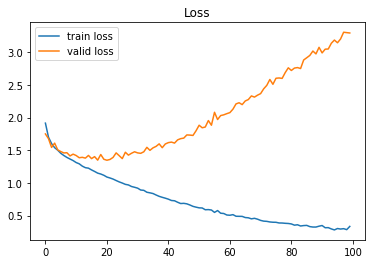

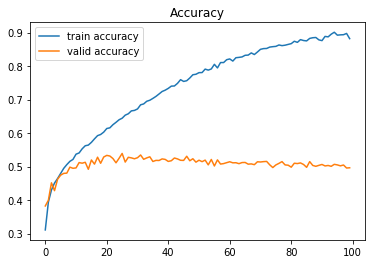

In [13]:
def build_mlp1():
    """Code Here
    建立你的神經網路
    """
    input_layer=keras.layers.Input([x_train.shape[-1]])
    x=keras.layers.Dense(units=512,activation="relu")(input_layer)
    x=keras.layers.Dense(units=256,activation="relu")(x)
    x=keras.layers.Dense(units=128,activation="relu")(x)
    out=keras.layers.Dense(units=10,activation="softmax")(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[out])

    return model
model1 = build_mlp1()

optimizer=keras.optimizers.Adam(lr=0.001)
model1.compile(loss="categorical_crossentropy",metrics=["accuracy"], optimizer=optimizer)

model1.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss1 = model1.history.history["loss"]
valid_loss1 = model1.history.history["val_loss"]

train_acc1 = model1.history.history["accuracy"]
valid_acc1 = model1.history.history["val_accuracy"]

plt.plot(range(len(train_loss1)), train_loss1, label="train loss")
plt.plot(range(len(valid_loss1)), valid_loss1, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc1)), train_acc1, label="train accuracy")
plt.plot(range(len(valid_acc1)), valid_acc1, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()